Still coming:

- `How does it work?` section
- `Last considerations` section

#### Troubles?

Do leave a comment if you have any trouble using this. I am in a full rush, but I will to answer the best I can.

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# CPE helper (Work in Progress)

Hello folks! This is the main kernel and where I will present my answer. I've been working a lot the last two months to provide an answer that would be really good for CPE and the things they do.

# Summary

TL;DR: I've created a file processor that has two main functions: generate population statistics for each police precinct and assist with the standardization of the police data.

*CPE image here*

Center for Policing Equity (CPE) is a research center that is focused on justice and racial equity. To put in a another light, they produce important research that helps law enforcement agencies and communities to forge a way towards mutual trust and public safety.

Now, CPE faces a sort of trouble, and that is the huge amount and huge variety in the data that they receive. Basically, they have information on:

- Location of police precincts
- Use of force incidents
- Officer-involved shootings
- Vehicle stops
- Etc

Another issue is that they need to aggregate data found at the police level and data found at the census level. I believe this was the main thing that was asked in this challenge and it is where my answer comes in...

I came up with a tool that automates a big part of the process. First, it retrieves demographic characteristics that are to be used in the analysis. Second, it makes those characteristics available at the police precinct level.

These are the main functions. But also, there is a full python package that gives support to it, providing a nice framework for CPE, be it if they decide to automate more of the process or if they just want a quick set of tools to assist with the daily work.

# Demonstration

*results here came from a local run (not on the Kaggle kernel)*

In [26]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [1]:
import pandas

from cpe_help import Department, util

%matplotlib inline

In [2]:
dept = Department.sample()

## ACS Data

### City level

In [3]:
path = dept.output_dir / 'acs' / 'city.geojson'
df = util.io.load_geojson(path)
df

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,...,RACE_NH_OTHER,RACE_NH_MULTIRACIAL,RACE_HISPANIC,POVERTY_TOTAL,POVERTY_BPL,POVERTY_NOT_BPL,EMPLOYMENT_TOTAL,EMPLOYMENT_EMPLOYED,EMPLOYMENT_UNEMPLOYED,geometry
0,25,07000,00619463,2507000,Boston,Boston city,25,C5,Y,Y,...,6898.0,15514.0,125087.0,614861.300907,129846.0,485015.300907,384981.433636,354353.433636,30628.0,"POLYGON ((-71.19115499999999 42.283059, -71.19..."


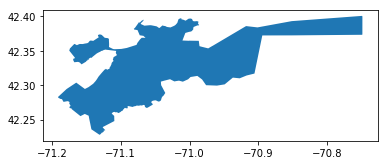

In [4]:
df.plot();

### Census tract level

In [5]:
path = dept.output_dir / 'acs' / 'census_tracts.geojson'
df = util.io.load_geojson(path)
df.head()

,state,county,tract,GEOGRAPHY_NAME,TOTAL_POPULATION,SEX_TOTAL,SEX_MALE,SEX_FEMALE,RACE_TOTAL,RACE_NH_WHITE,...,RACE_NH_OTHER,RACE_NH_MULTIRACIAL,RACE_HISPANIC,POVERTY_TOTAL,POVERTY_BPL,POVERTY_NOT_BPL,EMPLOYMENT_TOTAL,EMPLOYMENT_EMPLOYED,EMPLOYMENT_UNEMPLOYED,geometry
0,25,017,350700,"Census Tract 3507, Middlesex County, Massachus...",6424,6424,3395,3029,6424,4804,...,0,223,250,6399,1246,5153,4526,4174,352,"POLYGON ((-71.134623 42.404376, -71.134623 42...."
1,25,017,350800,"Census Tract 3508, Middlesex County, Massachus...",2027,2027,935,1092,2027,1590,...,0,105,93,2027,119,1908,1562,1543,19,"POLYGON ((-71.130698 42.400943, -71.128485 42...."
2,25,017,350900,"Census Tract 3509, Middlesex County, Massachus...",3727,3727,1752,1975,3727,3224,...,0,103,73,3727,293,3434,2915,2876,39,"POLYGON ((-71.12741 42.397487, -71.125415 42.3..."
3,25,017,351000,"Census Tract 3510, Middlesex County, Massachus...",7692,7692,3728,3964,7692,6040,...,113,170,390,7692,1371,6321,5673,5399,274,"POLYGON ((-71.11815900000001 42.388025, -71.11..."
4,25,017,351100,"Census Tract 3511, Middlesex County, Massachus...",6059,6059,2969,3090,6059,4398,...,17,123,642,6008,626,5382,4453,4382,71,"POLYGON ((-71.11056600000001 42.38505, -71.110..."


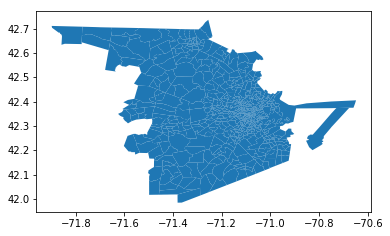

In [6]:
df.plot();

### Block group level

<https://en.wikipedia.org/wiki/Census_block_group>

In [7]:
path = dept.output_dir / 'acs' / 'block_groups.geojson'
df = util.io.load_geojson(path)
df.head()

,state,county,tract,block group,GEOGRAPHY_NAME,TOTAL_POPULATION,SEX_TOTAL,SEX_MALE,SEX_FEMALE,RACE_TOTAL,...,RACE_NH_OTHER,RACE_NH_MULTIRACIAL,RACE_HISPANIC,POVERTY_TOTAL,POVERTY_BPL,POVERTY_NOT_BPL,EMPLOYMENT_TOTAL,EMPLOYMENT_EMPLOYED,EMPLOYMENT_UNEMPLOYED,geometry
0,25,021,422302,2,"Block Group 2, Census Tract 4223.02, Norfolk C...",1007,1007,389,618,1007,...,0,157,58,1007,25,982,664,609,55,"POLYGON ((-70.94656000000001 42.184707, -70.94..."
1,25,021,406102,2,"Block Group 2, Census Tract 4061.02, Norfolk C...",942,942,500,442,942,...,0,0,30,942,42,900,560,521,39,"POLYGON ((-71.323128 42.173535, -71.32297 42.1..."
2,25,021,422800,4,"Block Group 4, Census Tract 4228, Norfolk Coun...",650,650,329,321,650,...,0,13,0,650,9,641,369,349,20,"POLYGON ((-70.967 42.244582, -70.9654100000000..."
3,25,021,409102,1,"Block Group 1, Census Tract 4091.02, Norfolk C...",2316,2316,1238,1078,2316,...,0,9,13,2316,100,2216,1254,1236,18,"POLYGON ((-71.38210599999999 42.129937, -71.38..."
4,25,021,422600,2,"Block Group 2, Census Tract 4226, Norfolk Coun...",1267,1267,546,721,1267,...,0,17,0,1267,0,1267,705,641,64,"POLYGON ((-70.93508 42.2245, -70.93489 42.2247..."


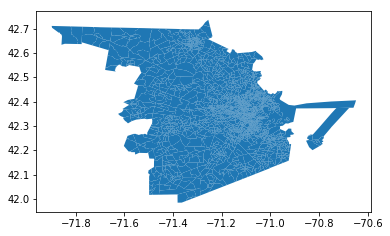

In [8]:
df.plot();

### Police precincts level

In [9]:
path = dept.output_dir / 'acs' / 'police_precincts.geojson'
df = util.io.load_geojson(path)
df.head()

,DISTRICT_I,ID,DISTRICT,SHAPE_area,SHAPE_len,TOTAL_POPULATION,SEX_TOTAL,SEX_MALE,SEX_FEMALE,RACE_TOTAL,...,RACE_NH_OTHER,RACE_NH_MULTIRACIAL,RACE_HISPANIC,POVERTY_TOTAL,POVERTY_BPL,POVERTY_NOT_BPL,EMPLOYMENT_TOTAL,EMPLOYMENT_EMPLOYED,EMPLOYMENT_UNEMPLOYED,geometry
0,0.0,D14,D14,1.236310e+08,58042.148803,68583.238982,68583.238982,31954.560456,36628.678526,68583.238982,...,559.284171,1732.683661,7470.725989,59483.144216,14650.478354,44832.665862,41548.738777,39290.786355,2257.952423,POLYGON ((-71.11075672247946 42.35221730534519...
1,0.0,A15,A15,3.798285e+07,57557.005649,16226.937067,16226.937067,7367.324977,8859.612090,16226.937067,...,78.171013,230.671598,1810.675012,16082.490621,3218.597860,12863.892762,9961.380905,9539.959250,421.421655,(POLYGON ((-71.07415951933648 42.3905029979474...
2,0.0,A7,A7,1.401151e+08,138468.216239,42156.125717,42156.125717,22862.051900,19294.073817,42156.125717,...,106.141773,1572.260704,24867.663293,41993.869204,7674.570302,34319.298902,26162.960328,24335.605136,1827.355192,(POLYGON ((-70.99644373897635 42.3955593012363...
3,0.0,A1,A1,4.545927e+07,49109.158160,41740.089909,41740.089909,20742.676021,20997.413888,41740.089909,...,106.244261,880.788978,2522.886124,37949.966075,5947.728693,32002.237381,27796.025700,26282.768597,1513.257103,POLYGON ((-71.05199465132354 42.36882731998438...
4,0.0,D4,D4,7.004073e+07,40964.780546,87220.968960,87220.968960,42410.731066,44810.237894,87220.968960,...,368.440166,2122.094637,11828.227158,69644.046459,17784.838547,51859.207913,51918.577912,47864.901963,4053.675949,POLYGON ((-71.06182602641412 42.34393907752123...


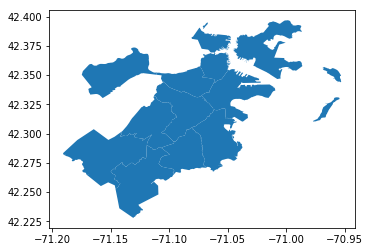

In [10]:
df.plot();

## Individual department files

Individual department files can also be processed. For example, the use of force file for the Austin Police Department had coordinate variables in a non-usual CRS (coordinate reference system). The processing step transformed those coordinates into the latitude and longitude values.

In [11]:
dept = Department('37-00027')

Original file:

In [12]:
df = dept.files['uof'].load_raw()
df.head()

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_ROLE,...,Unnamed: 19,OFFICER_YEARS_ON_FORCE,Y_COORDINATE,Y_COORDINATE.1,LOCATION_DISTRICT.1,LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,LOCATION_CITY,LOCATION_STATE,LOCATION_LATITUDE,LOCATION_LONGITUDE
0,156701,2015541517,2/24/2015,FR,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,167510327: 2015541517,M,Hispanic,NaN,...,CRIMINAL INTERDICTION / K9,3,3100341,10030899,5.0,9900 BLOCK S IH 35 SB,Austin,TX,NaN,NaN
1,161046,20151510003,5/31/2015,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,459191174: 20151510003,M,Hispanic,NaN,...,GEORGE 300 REG I PATROL,5,3115535,10070296,9.0,409 E 6TH ST,Austin,TX,NaN,NaN
2,161381,20151510003,5/31/2015,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459191174: 20151510003,M,Hispanic,NaN,...,GEORGE 300 REG I PATROL,7,3115535,10070296,9.0,409 E 6TH ST,Austin,TX,NaN,NaN
3,142588,2014111929,1/11/2014,HE,TRAFFIC STOP,NECESSARY TO DEFEND REPORTING OFFICER,198377769: 2014111929,M,Black,SUSPECT,...,HENRY 700 REG III PATROL,4,3117503,10057313,NaN,BURTON DR / E OLTORF ST,Austin,TX,NaN,NaN
4,162084,20151720001,6/21/2015,GE,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,459030448: 20151720001,M,Black,NaN,...,GEORGE 400 REG I PATROL,3,3116713,10067447,3.0,SAN MARCOS ST / SPENCE ST,Austin,TX,NaN,NaN


Processed file:

In [13]:
df = dept.files['uof'].load_processed()
df.head()

,RIN,PRIMARY_KEY,INCIDENT_DATE,LOCATION_DISTRICT,INCIDENT_REASON,REASON_FOR_FORCE,SUBJECT_ID,SUBJECT_GENDER,SUBJECT_RACE,SUBJECT_DESCRIPTION,...,LOCATION_STATE,LOCATION_GEOCODED,NUMBER_EC_CYCLES,SUBJECT_ROLE,LOCATION_LATITUDE,LOCATION_LONGITUDE,TYPE_OF_FORCE_USED2,TYPE_OF_FORCE_USED3,TYPE_OF_FORCE_USED4,geometry
0,156701,2015541517,2015-02-24T00:00:00,FR,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,167510327: 2015541517,M,Hispanic,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,...,TX,1,NaN,None,NaN,NaN,None,None,None,POINT (-97.78993508477365 30.15939914213043)
1,161046,2147483647,2015-05-31T00:00:00,GE,VIEWED OFFENSE,NECESSARY TO EFFECT ARREST / DETENTION,459191174: 20151510003,M,Hispanic,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,...,TX,1,NaN,None,NaN,NaN,None,None,None,POINT (-97.73896571602758 30.26673094752446)
2,161381,2147483647,2015-05-31T00:00:00,GE,VIEWED OFFENSE,"IN CUSTODY, MAINTAINING CONTROL",459191174: 20151510003,M,Hispanic,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,...,TX,1,1.0,None,NaN,NaN,None,None,None,POINT (-97.73896571602758 30.26673094752446)
3,142588,2014111929,2014-01-11T00:00:00,HE,TRAFFIC STOP,NECESSARY TO DEFEND REPORTING OFFICER,198377769: 2014111929,M,Black,EDP/MENTALLY UNSTABLE; SUSPECTED UNDER INFLUEN...,...,TX,1,NaN,SUSPECT,NaN,NaN,None,None,None,POINT (-97.73369451571814 30.23091640447373)
4,162084,2147483647,2015-06-21T00:00:00,GE,DISPATCHED CALL,TO RESTRAIN FOR SUBJECTS SAFETY,459030448: 20151720001,M,Black,SUSPECTED UNDER INFLUENCE OF ALCOHOL/DRUGS,...,TX,1,NaN,None,NaN,NaN,None,None,None,POINT (-97.73544600762763 30.25882389999299)


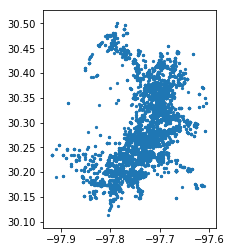

In [14]:
df = df[df['LOCATION_GEOCODED'].astype(bool)]
df.plot(markersize=5);

## Python package

The answer in itself is a python package. So, if you are using python, you can access department methods directly.

In [15]:
from cpe_help import Department

dept = Department.sample()
dept

Department('11-00091')

In [16]:
dept.full_name

'11-00091 (Boston, MA)'

In [17]:
df = dept.load_police_precincts()
df.head()

,DISTRICT_I,ID,DISTRICT,SHAPE_area,SHAPE_len,TOTAL_POPULATION,SEX_TOTAL,SEX_MALE,SEX_FEMALE,RACE_TOTAL,...,RACE_NH_OTHER,RACE_NH_MULTIRACIAL,RACE_HISPANIC,POVERTY_TOTAL,POVERTY_BPL,POVERTY_NOT_BPL,EMPLOYMENT_TOTAL,EMPLOYMENT_EMPLOYED,EMPLOYMENT_UNEMPLOYED,geometry
0,0.0,D14,D14,1.236310e+08,58042.148803,68583.238982,68583.238982,31954.560456,36628.678526,68583.238982,...,559.284171,1732.683661,7470.725989,59483.144216,14650.478354,44832.665862,41548.738777,39290.786355,2257.952423,POLYGON ((-71.11075672247946 42.35221730534519...
1,0.0,A15,A15,3.798285e+07,57557.005649,16226.937067,16226.937067,7367.324977,8859.612090,16226.937067,...,78.171013,230.671598,1810.675012,16082.490621,3218.597860,12863.892762,9961.380905,9539.959250,421.421655,(POLYGON ((-71.07415951933648 42.3905029979474...
2,0.0,A7,A7,1.401151e+08,138468.216239,42156.125717,42156.125717,22862.051900,19294.073817,42156.125717,...,106.141773,1572.260704,24867.663293,41993.869204,7674.570302,34319.298902,26162.960328,24335.605136,1827.355192,(POLYGON ((-70.99644373897635 42.3955593012363...
3,0.0,A1,A1,4.545927e+07,49109.158160,41740.089909,41740.089909,20742.676021,20997.413888,41740.089909,...,106.244261,880.788978,2522.886124,37949.966075,5947.728693,32002.237381,27796.025700,26282.768597,1513.257103,POLYGON ((-71.05199465132354 42.36882731998438...
4,0.0,D4,D4,7.004073e+07,40964.780546,87220.968960,87220.968960,42410.731066,44810.237894,87220.968960,...,368.440166,2122.094637,11828.227158,69644.046459,17784.838547,51859.207913,51918.577912,47864.901963,4053.675949,POLYGON ((-71.06182602641412 42.34393907752123...


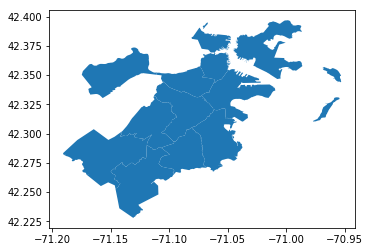

In [18]:
df.plot();

## Output directory

If you want to retrieve the outputs manually, they are stored in a specific directory for each department.

For example:

In [20]:
for file in util.file.list_files(dept.output_dir):
    print(file.relative_to(util.path.BASE_DIR))

data/output/department/11-00091/sanity_check.html
data/output/department/11-00091/_sanity_check/report.md
data/output/department/11-00091/_sanity_check/figures/figure1.png
data/output/department/11-00091/_sanity_check/figures/figure3.png
data/output/department/11-00091/_sanity_check/figures/figure2.png
data/output/department/11-00091/_sanity_check/figures/figure4.png
data/output/department/11-00091/_sanity_check/figures/figure5.png
data/output/department/11-00091/acs/block_groups.geojson
data/output/department/11-00091/acs/police_precincts.geojson
data/output/department/11-00091/acs/city.geojson
data/output/department/11-00091/acs/census_tracts.geojson


# How to use it?

## Preparation

Before running the project, you will first need to do some preparation steps...

### Clone the repository

The project itself is being hosted at github. If you have git, you can clone it by running the command:

```bash
git clone https://github.com/araraonline/kag-cpe
```

If you do not have git, you can download the repository directly from the project page:

1. Go to <https://github.com/araraonline/kag-cpe>
2. Click "Clone or download" and then ""Download ZIP"
3. Once you download the zip file, extract it to a directory of your choice

### Install conda

Conda is a package and environment manager that is used to install the dependencies for the project. You can retrieve it by installing Anaconda or Miniconda. Miniconda is a lightweight version of Anaconda, I usually opt for it!

- [Download Anaconda](https://www.anaconda.com/download/)
- [Download Miniconda](https://conda.io/miniconda.html)

### Create the conda environment

To run the project, you will need a custom conda environment. You can create one by:

1. Start the Anaconda prompt (Windows) or terminal (Linux/MacOS)
2. Move into the project root directory (`cd` into it)
3. Update conda using the following command

   ```
   conda update conda
   ```

4. Create the environment

   ```
   conda env create -f environment.yml
   ```

The last step may take a while (don't worry if it looks stuck at the `Solving...` phase, it is just calculating things). Once it finishes, take a look at the final lines of output and, it's all done!

## Configuration

It is also possible to configure some things.

Most of the configuration is present in the `cpe_help.conf` file. It is in a simple format that resembles windows INI files.

Some parameters:


### Census year

This is the year Census data will be retrieved from. For example, if it is configured to 2015, the machine will retrieve ACS 5-year estimates from 2011 to 2015 and TIGER shapefiles from 2015. As I'm writing, there's data available up to 2017 ([release](https://www.census.gov/programs-surveys/acs/news/data-releases/2017/release.html)).
  
*Do not change the year without checking ACS variables first*. The name of the variable on the ACS endpoint [may vary from year to year](https://www.census.gov/programs-surveys/acs/technical-documentation/table-and-geography-changes.html). This can lead the machine to download erroneous values.

### Census key

This is the key that will be used in the requests to the Census API. Make sure to **[request a new key](https://api.census.gov/data/key_signup.html)** and set it up in the configuration file.

### ACS Variables

Represents variables that will be requested from the Census API (ACS 5-year esimates).
  
The values to left of ` = ` correspond to the variable names in the Census Data API. The values to the right correspond to how we want to save this variable locally.
  
You can look at this [little guide](https://www.kaggle.com/center-for-policing-equity/data-science-for-good/discussion/70489) if you think of adding new variables.
  
Also, make sure that the variables are available at the block group level (some aren't, even if they are part of a detailed table).

### Date format

Sets the standard date and time format for output ([reference](http://strftime.org/)).

### User-Agent

Determines the [User-Agent string](https://developer.mozilla.org/en-US/docs/Web/HTTP/Headers/User-Agent) sent alongside requests. It should contain identification and possibly a way to contact CPE.

Some pointers on choosing the User-Agent string: <https://webmasters.stackexchange.com/a/6305>

## Running

This is the easiest step, but also takes a long time on the first run.

You must first activate your conda environment:

- Windows: `activate cpe-kaggle`
- Linux/MacOS: `source activate cpe-kaggle`

Then, make sure you are in the package main directory and run the preparation script (it will create the necessary directories for departments/etc):

```
doit -f prepare_kaggle.py
```

After that, you can start the script for the main pipeline:

```
doit
```

*(when no file is specified, the default file executed is the dodo.py)*

After this, you will see a long list of tasks being executed. (message me if you've got any errors). Their names are pretty indicative. You can see what they are actually doing by reading the dodo.py source code or get a simple description by running the command `doit list`.

Take note that some tasks will take a long time to run. This is due to them being CPU-intensive or downloading a big amount of data.

## Customizing departments

Each department can have a specific class linked to it (which defaults to the Department class, if not specified). To create custom behavior for a specific department (say, department 37-00027):

1. Create a `department3700027.py` file at the `cpe_help/departments` directory.
2. Inside the file, declare a subclass of Department named Department3700027. For example:

In [21]:
from cpe_help import Department

class Department3700027(Department):
    # code for the department goes here
    # ...
    pass

3. Override/create any of the methods you want

   For example, if you want to set a specific CRS when loading the input shapefile, you can override the `load_external_shapefile` method:

In [ ]:
from cpe_help import Department, util

class Department3700027(Department):

    # NAD 1983 StatePlane Texas Central FIPS 4203 Feet
    CRS = util.crs.from_esri(102739)

    def load_external_shapefile(self):
        # set up CRS when loading police boundaries
        df = super().load_external_shapefile()
        df.crs = self.CRS
        return df

And it's done!

*you can also add department-specific files for precessing, check the [DepartmentFile](#DepartmentFile) section below*